# LDA

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import pandas as pd
from nltk.tokenize import word_tokenize
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
import nltk
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import plotly.express as px
nltk.download('punkt')

C:\Users\h1enr\anaconda3\lib\site-packages\plotly\express\imshow_utils.py:24: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),
C:\Users\h1enr\anaconda3\lib\site-packages\xarray\core\pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
C:\Users\h1enr\anaconda3\lib\site-packages\xarray\core\pycompat.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion("0.0.0")
C:\Users\h1enr\anaconda3\lib\site-packages\xarray\core\pycompat.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion("0.0.0")
C:\Users\h1enr\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packa

True

In [2]:
df = pd.read_csv("analysis_ready.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.drop(columns=["Title", "URL", "Content", "Regions"])
countries = [
    "Australia",
    "China",
    "Hong Kong",
    "Japan",
    "Singapore",
    "South Korea",
    "United Kingdom",
    "United States",
]
df = df[df["Mode"].isin(countries)]
df["Tokens"] = df["Text"].apply(word_tokenize)
df.head(5)

,Source,Date,Text,Mode,sadness,joy,love,anger,fear,surprise,Sentiment,Confidence,Subjectivity,Tokens
0,straitstimes,2020-02-01,wuhan virus smooth start free mask distributio...,Singapore,0.220734,0.399007,0.002547,0.132190,0.243483,0.002039,POSITIVE,0.554886,0.493929,"[wuhan, virus, smooth, start, free, mask, dist..."
1,koreatimes,2020-02-05,coronavirus expert urge gov close border china...,China,0.236124,0.028613,0.002012,0.192871,0.538262,0.002118,NEGATIVE,0.929699,0.236876,"[coronavirus, expert, urge, gov, close, border..."
2,asahi,2020-02-08,father guilty causing daughter death shaking y...,Japan,0.062664,0.005717,0.000816,0.442537,0.487329,0.000936,NEGATIVE,0.650388,0.533333,"[father, guilty, causing, daughter, death, sha..."
3,koreatimes,2020-02-11,korea expands strict quarantine screening hong...,China,0.046577,0.023583,0.002116,0.045006,0.880297,0.002420,NEGATIVE,0.861701,0.330804,"[korea, expands, strict, quarantine, screening..."
4,todayonline,2020-02-11,hk tvb producer robert chua opening pore shop ...,Hong Kong,0.009739,0.774091,0.002871,0.015521,0.196641,0.001136,POSITIVE,0.988636,0.391150,"[hk, tvb, producer, robert, chua, opening, por..."


In [3]:
def find_optimal_topics(df):
    tokens = df["Tokens"].tolist()
    dictionary = Dictionary(tokens)
    corpus = [dictionary.doc2bow(token) for token in tokens]

    results = []
    for num_topics in range(2, 21):
        for num_passes in [10, 20, 50, 100]:
            avg_coherence_score = 0
            for j in range(5):
                model = LdaModel(
                    corpus=corpus,
                    id2word=dictionary,
                    num_topics=num_topics,
                    passes=num_passes,
                    alpha="auto",
                    eta="auto",
                )
                cm = CoherenceModel(
                    model=model,
                    texts=tokens,
                    corpus=corpus,
                    dictionary=dictionary,
                    coherence="c_v",
                )
                avg_coherence_score += cm.get_coherence()
            avg_coherence_score /= 5
            results.append((num_topics, avg_coherence_score, num_passes))

    results_df = pd.DataFrame(results, columns=["num_topics", "coherence_score", "num_passes"])
    
    return results_df

In [4]:
results_df = find_optimal_topics(df)
results_df.to_csv("results3.csv")
results_df

,num_topics,coherence_score,num_passes
0,2,0.346879,10
1,2,0.365303,20
2,3,0.368666,10
3,3,0.385921,20
4,4,0.383852,10
5,4,0.399434,20
6,5,0.386264,10
7,5,0.406197,20
8,6,0.414387,10
9,6,0.410318,20


In [3]:
tokens = df["Tokens"].tolist()
dictionary = Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]

model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=18,
    passes=50,
    alpha="auto",
    eta="auto",
)

cm = CoherenceModel(
    model=model,
    texts=tokens,
    corpus=corpus,
    dictionary=dictionary,
    coherence="c_v",
)

cm.get_coherence()

0.475198273206465

In [29]:
vis_data = gensimvis.prepare(model, corpus, dictionary)
pyLDAvis.save_html(vis_data, 'lda2.html')
pyLDAvis.display(vis_data)

C:\Users\h1enr\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


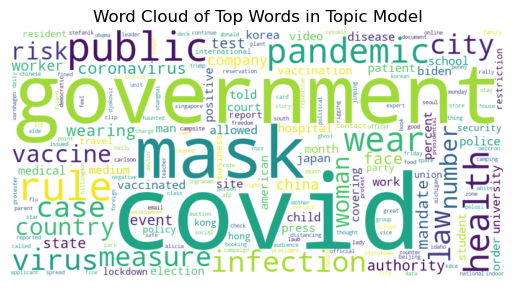

In [43]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

topics = model.show_topics(num_topics=18, num_words=30, formatted=False)

all_words = ' '.join([word[0] for topic in topics for word in topic[1]])
stopwords = {'people', 'year', 'day', 'week', 'time'}
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(all_words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top Words in Topic Model')
plt.savefig('word_cloud.png')
plt.show()

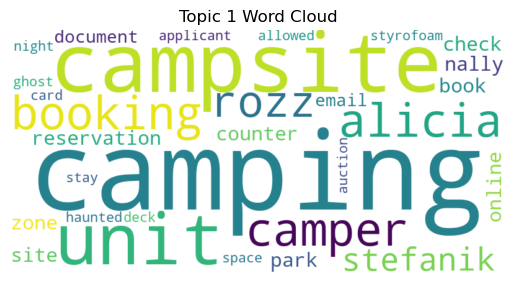

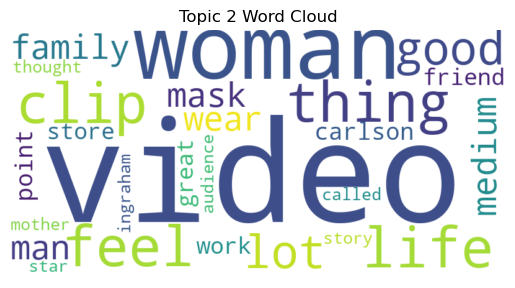

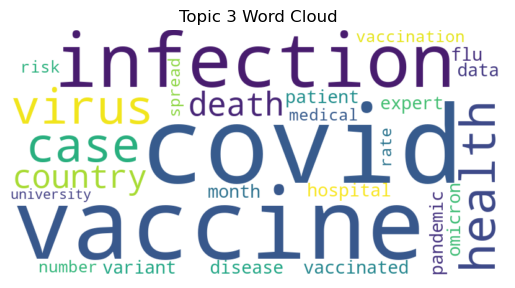

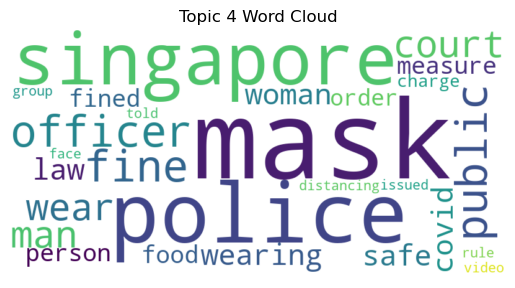

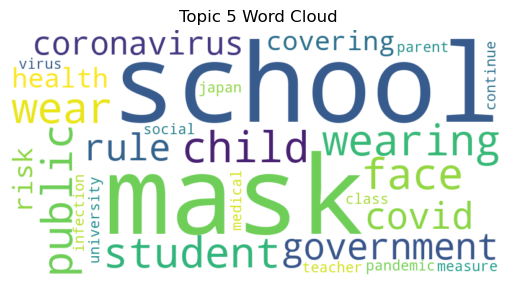

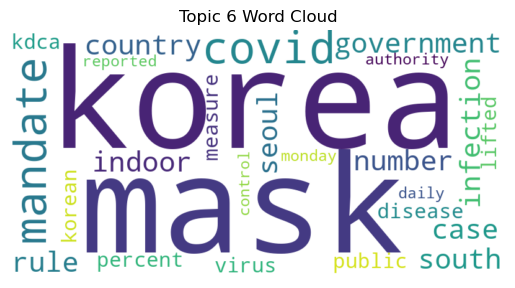

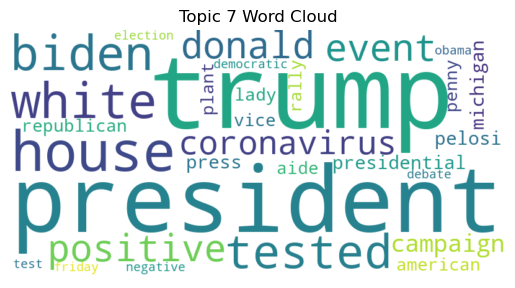

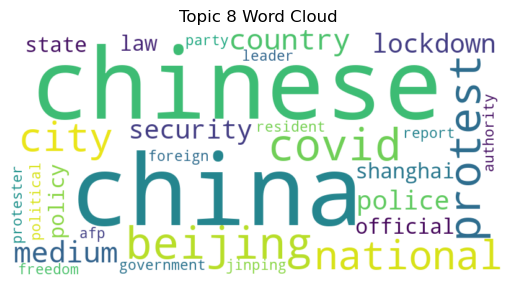

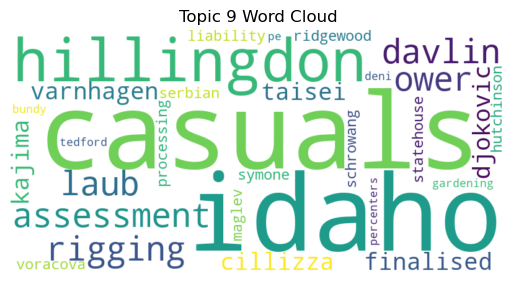

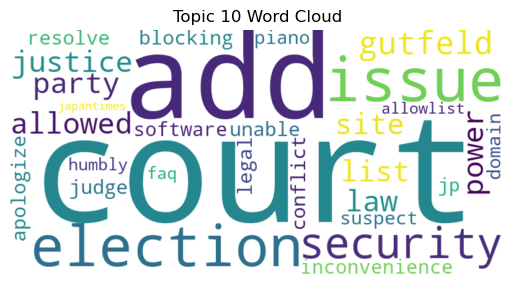

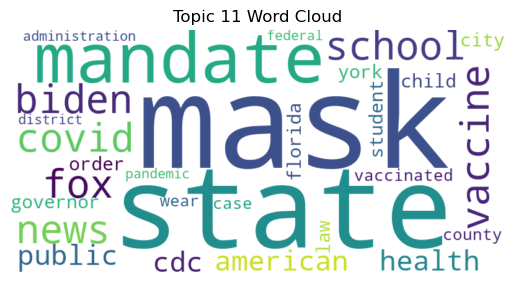

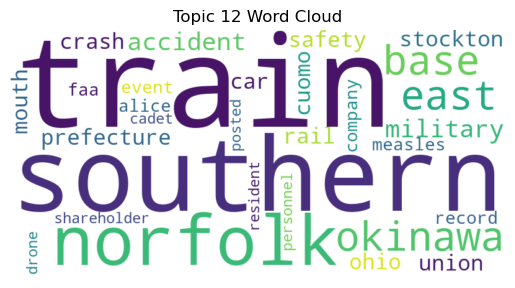

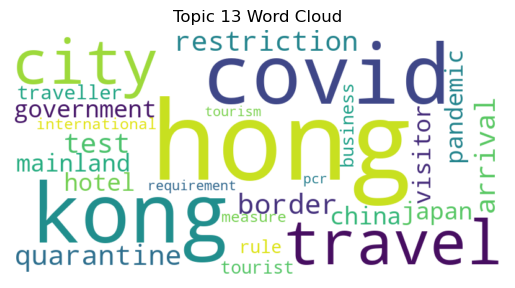

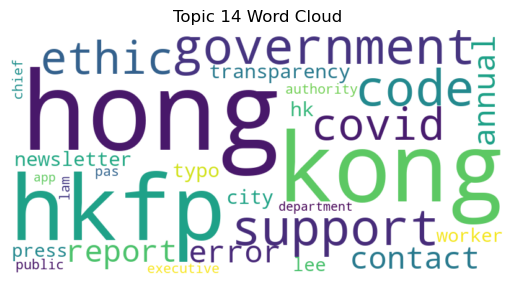

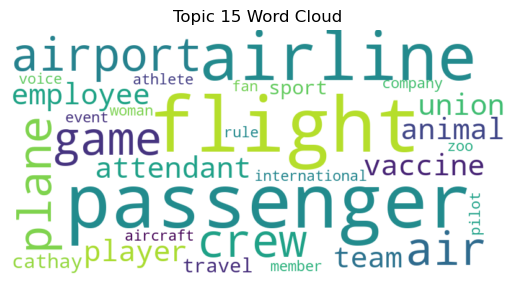

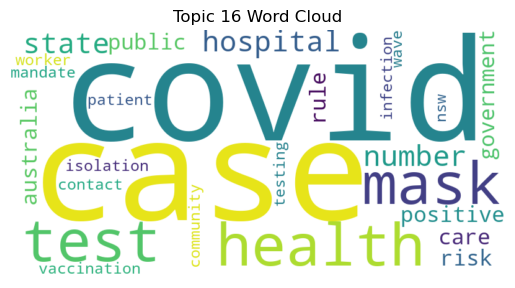

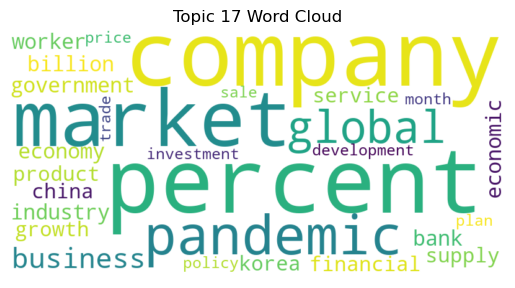

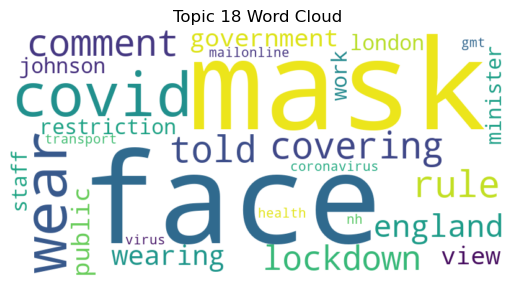

In [42]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import matplotlib.pyplot as plt
from wordcloud import WordCloud

try:
    topics = model.show_topics(num_topics=18, num_words=30, formatted=False)
except:
    print('Error: Model does not have at least 18 topics.')

# stopwords = {'people', 'year', 'day', 'week', 'time'}

for i, topic in enumerate(topics):
    all_words = ' '.join([word[0] for word in topic[1]])
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(all_words)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Topic ' + str(i+1) + ' Word Cloud')
    plt.savefig('topic_' + str(i+1) + '_word_cloud.png')
    plt.show()
